In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
#abrir arquivo e armazena-lo em um dataframe
path = "/home/gregorio/Downloads/iris.data"
arquivo = pd.read_csv(path, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'] )
arquivo.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


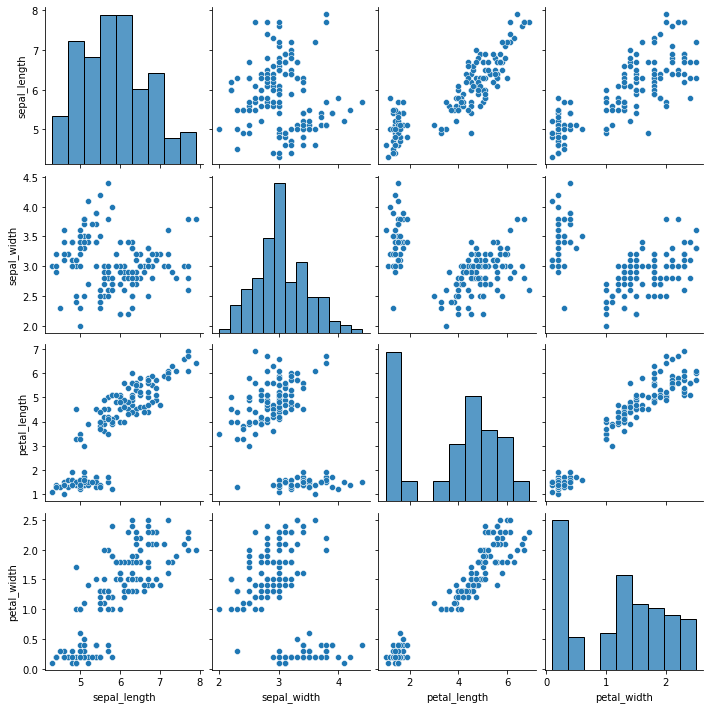

In [4]:
sns.pairplot(arquivo)

array([[<AxesSubplot:xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='petal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_

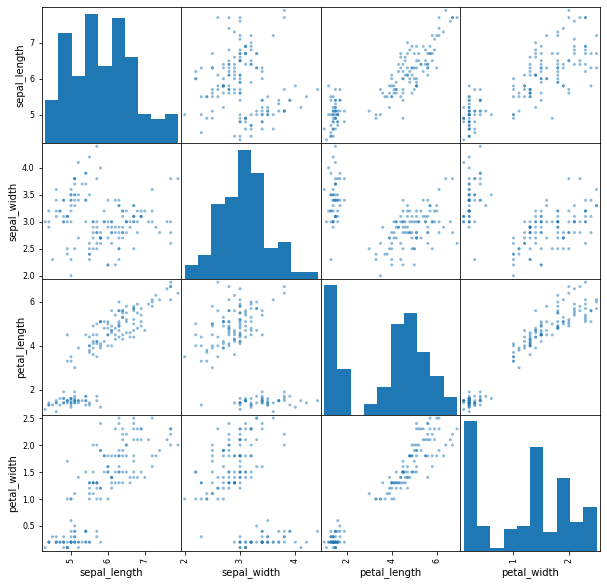

In [4]:
pd.plotting.scatter_matrix(arquivo, figsize = (10,10))

[None]

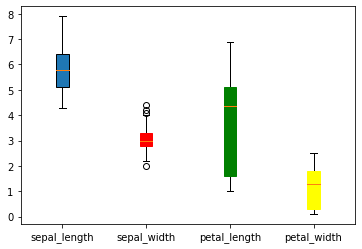

In [5]:
#plot dos boxplots

box=[]
box.append(plt.boxplot(arquivo['sepal_length'], patch_artist= True, positions = [1]))
box.append(plt.boxplot(arquivo['sepal_width'], patch_artist= True, positions = [2]))
box.append(plt.boxplot(arquivo['petal_length'], patch_artist= True, positions = [3]))
box.append(plt.boxplot(arquivo['petal_width'], patch_artist= True, positions = [4]))
plt.xticks([1,2,3,4], ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.setp(box[1]['boxes'], color = 'red')
plt.setp(box[2]['boxes'], color = 'green')
plt.setp(box[3]['boxes'], color = 'yellow')


In [13]:
k=5
acc_train = []
acc_test = []

x = arquivo.iloc[:, :-1].values
y = arquivo.iloc[:, 4].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

classifier = KNeighborsClassifier(n_neighbors = k)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

acc_train.append(classifier.score(x_train, y_train))
acc_test.append(classifier.score(x_test, y_test))




Acuracia do K-Nearest Neighbors no Treinamento: 0.95
Acuracia do K-Nearest Neighbors no Teste: 0.93

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.86      0.86      0.86         7

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30



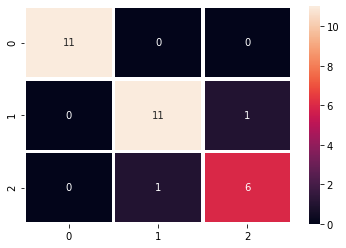

In [14]:
print('\nAcuracia do K-Nearest Neighbors no Treinamento: {:.2f}'.format(acc_train[0]))
print('Acuracia do K-Nearest Neighbors no Teste: {:.2f}'.format(acc_test[0]))
print()
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in range(3)],columns = [i for i in range(3)])
sns.heatmap(df_cm, annot=True, linewidths=2.5)
print (classification_report(y_test, y_pred))